In [47]:
!pip install wordcloud

import preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [40]:
# Getting preprocessed dataset
df = pd.read_csv("preprocessed_tweetsentimentdata.csv", encoding="ISO-8859-1", header=0)


In [41]:
# Splitting the data. 90% training data, 10% test data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.1, random_state = 0)


In [42]:
# Vectorize the data. 
# Vectorization -> process of transforming text data into a numerical representation that can be used by models
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [43]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Time Taken: 78 seconds
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     79591
           4       0.81      0.82      0.82     79789

    accuracy                           0.81    159380
   macro avg       0.82      0.81      0.81    159380
weighted avg       0.82      0.81      0.81    159380



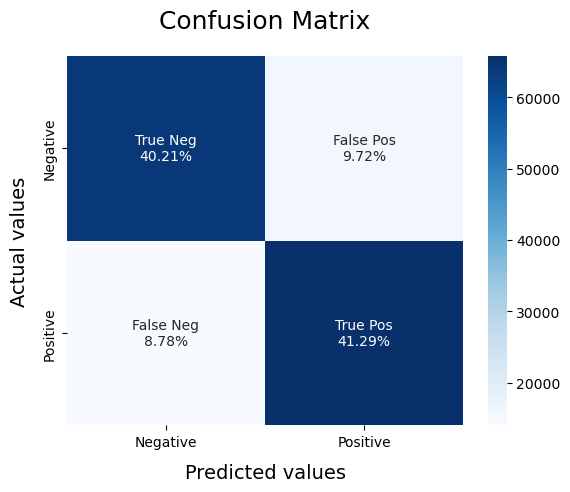

In [44]:
import time
t = time.time()
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
print(f'Time Taken: {round(time.time()-t)} seconds')
model_Evaluate(LRmodel)

In [45]:
def predict(vectorizer, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df


In [49]:
tweets = ["The movie was amazing", "The movie was boring", "I love Nike", "I hate Nike", "I'm scared"]


tweetSentimentDF = predict(vectorizer, LRmodel, tweets)
print(tweetSentimentDF.head())

                    text sentiment
0  The movie was amazing  Positive
1   The movie was boring  Negative
2            I love Nike  Positive
3            I hate Nike  Negative
4             I'm scared  Negative
